# 03_Datenbereinigung

## 1) Libraries importieren

In [65]:
# Libraries importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Daten einlesen

In [71]:
# Sample Dataset 100k einlesen
df = pd.read_csv("../Data/sample_data_100k.csv")

/var/folders/kp/zxdhgy711jnb_bngbg987tt80000gn/T/ipykernel_80200/654392830.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../Data/sample_data_100k.csv")


In [91]:
# Info anzeigen 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100040 entries, 0 to 100039
Data columns (total 67 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               100040 non-null  int64  
 1   vin                      100040 non-null  object 
 2   back_legroom             94722 non-null   object 
 3   bed                      659 non-null     object 
 4   bed_height               14110 non-null   object 
 5   bed_length               14110 non-null   object 
 6   body_type                99607 non-null   object 
 7   cabin                    2058 non-null    object 
 8   city                     100040 non-null  object 
 9   city_fuel_economy        83760 non-null   float64
 10  combine_fuel_economy     0 non-null       float64
 11  daysonmarket             100040 non-null  int64  
 12  dealer_zip               100040 non-null  object 
 13  description              97428 non-null   object 
 14  engi

## 3) Dataset mit relevanten Variablen erstellen

Gemäss den Überlegungen zu den 66 Features (vgl. schrifltiche Dokumentation, Tableau-File und Notebook 2) wird hier ein Dataset erstellt, welches nur noch die relevanten Features beinhaltet

In [101]:
# DataFrame df_reduced mit relevanten Features aus df erstellen
df_reduced = df[["body_type", "city_fuel_economy", "fuel_type", "highway_fuel_economy", "horsepower",
                "make_name", "mileage", "model_name", "price", "transmission", "wheel_system_display", "year","listed_date"]]

In [152]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100040 entries, 0 to 100039
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             99607 non-null   object 
 1   city_fuel_economy     83760 non-null   float64
 2   fuel_type             97324 non-null   object 
 3   highway_fuel_economy  83760 non-null   float64
 4   horsepower            94274 non-null   float64
 5   make_name             100040 non-null  object 
 6   mileage               95199 non-null   float64
 7   model_name            100040 non-null  object 
 8   price                 100040 non-null  float64
 9   transmission          97824 non-null   object 
 10  wheel_system_display  95121 non-null   object 
 11  year                  100040 non-null  int64  
 12  listed_date           100040 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 9.9+ MB


## 4) Daten bereinigen

### 4.1) Outliers entfernen

Wie in Notebook 2_DataAnalysis ersichtlich, sind die Preise sehr breit gestreut und insbesondere gegen oben gibt es grosse Ausreisser. Wir haben die Outlier in der Variable "Preis" dehsalb bereinigt. Damit wollen wir die spätere Vorhersage des Modells verbessern.

Für die Methode der Outlier-Bereinigung haben wir den Z-Score verwendet. Dabei haben wir alle Werte ausgeschlossen, die ausserhalb von 3 Standardabweichungen liegen. (Quellen: https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/; ChatGPT: https://chatgpt.com/share/3850c586-fa1d-4d85-9839-85ddb082797f)

In [115]:
# Outliers entfernen mittels Z-Score und neues DataFrame erstellen
z_scores = np.abs((df_reduced["price"] - df_reduced["price"].mean()) / df_reduced["price"].std()) #Z-Scores berechnen
df_no_outliers = df_reduced[z_scores < 3] #neues Dataf^Frame erstellen, in denen Scores kleiner als 3 ist

In [119]:
# Head anzeigen
df_no_outliers.head()

,body_type,city_fuel_economy,fuel_type,highway_fuel_economy,horsepower,make_name,mileage,model_name,price,transmission,wheel_system_display,year,listed_date
0,SUV / Crossover,NaN,Gasoline,NaN,340.0,Land Rover,88.0,Range Rover Velar,70742.0,A,All-Wheel Drive,2020,2019-10-21
1,Sedan,23.0,Gasoline,36.0,184.0,Chrysler,25794.0,200,13000.0,A,Front-Wheel Drive,2016,2020-08-20
2,SUV / Crossover,NaN,Gasoline,NaN,177.0,Jeep,20.0,Renegade,31221.0,A,Four-Wheel Drive,2019,2019-04-23
3,SUV / Crossover,18.0,Gasoline,25.0,295.0,Dodge,15732.0,Durango,27300.0,A,All-Wheel Drive,2018,2020-07-29
4,SUV / Crossover,NaN,Gasoline,NaN,182.0,Chevrolet,35363.0,Equinox,13823.0,A,Front-Wheel Drive,2016,2020-06-24


In [130]:
# Info anzeigen - 13 Variablen und 99'251 Instanzen
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99251 entries, 0 to 100039
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             98834 non-null  object 
 1   city_fuel_economy     83172 non-null  float64
 2   fuel_type             96583 non-null  object 
 3   highway_fuel_economy  83172 non-null  float64
 4   horsepower            93565 non-null  float64
 5   make_name             99251 non-null  object 
 6   mileage               94460 non-null  float64
 7   model_name            99251 non-null  object 
 8   price                 99251 non-null  float64
 9   transmission          97053 non-null  object 
 10  wheel_system_display  94395 non-null  object 
 11  year                  99251 non-null  int64  
 12  listed_date           99251 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 10.6+ MB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


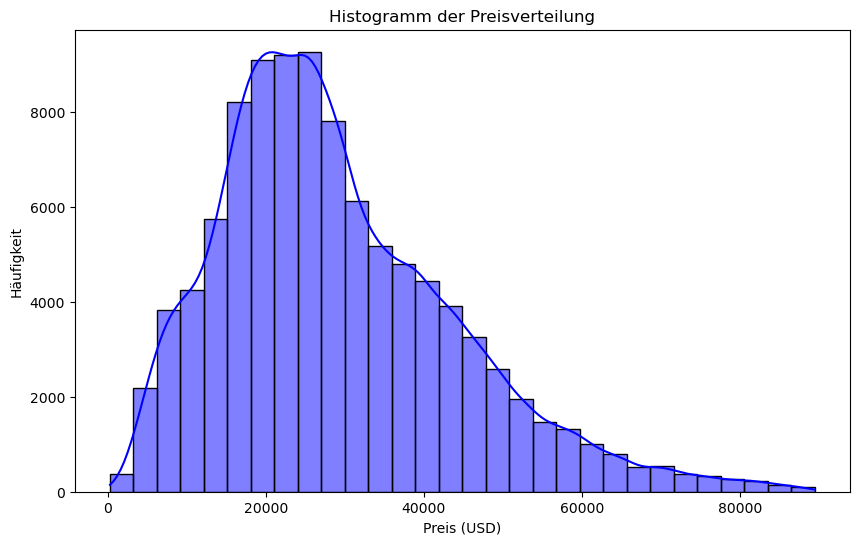

In [127]:
# Histogramm der Preise nach Outlier-Bereinigung
plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers["price"], kde=True, bins=30, color="blue")
plt.title("Histogramm der Preisverteilung")
plt.xlabel("Preis (USD)")
plt.ylabel("Häufigkeit")
plt.show()

### 4.2) Null Werte Droppen

Das Dataset ohne Outlier hat bei verschiedenen Features noch Null-Values, die in diesem Schritt gedroppt werden. Dieses Vorgehen wird gewählt, da das DataSet auch nach dem Entfernen der Null-Values noch genügend gross ist.

Zusätzlich werden alle Zeilen mit Werten == "--" entfernt, da diese Werte gleich wie Null-Values gewertet werden können.

In [136]:
# Neues Dataframe ohne Null-Values erstellen
df_dropna = df_reduced.dropna() 

# Zeilen entfernen, in denen irgendwo '--' vorkommt
df_dropna = df_dropna[~df_dropna.isin(["--"]).any(axis=1)]

### 4.3) Einzelne Werte sachlogisch ausschliessen

In [139]:
# Neues Dataframe für nächste Cleaning Schritte
df_clean = df_dropna

body_type
SUV / Crossover    38562
Sedan              20807
Pickup Truck        9770
Minivan             2309
Hatchback           2216
Coupe               1675
Convertible          586
Van                  558
Name: count, dtype: int64

Fluel_Economy

In [29]:
# Neue Spalte mit durchschnittlichem Verbrauch aus city_fuel_economy und highway_fuel_economy
df_clean["average_fuel_economy"] = (df["city_fuel_economy"] + df["highway_fuel_economy"]) / 2
df_clean = df_clean.drop(["city_fuel_economy", "highway_fuel_economy"], axis = 1)

/var/folders/kp/zxdhgy711jnb_bngbg987tt80000gn/T/ipykernel_80200/2809891329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["average_fuel_economy"] = (df["city_fuel_economy"] + df["highway_fuel_economy"]) / 2


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


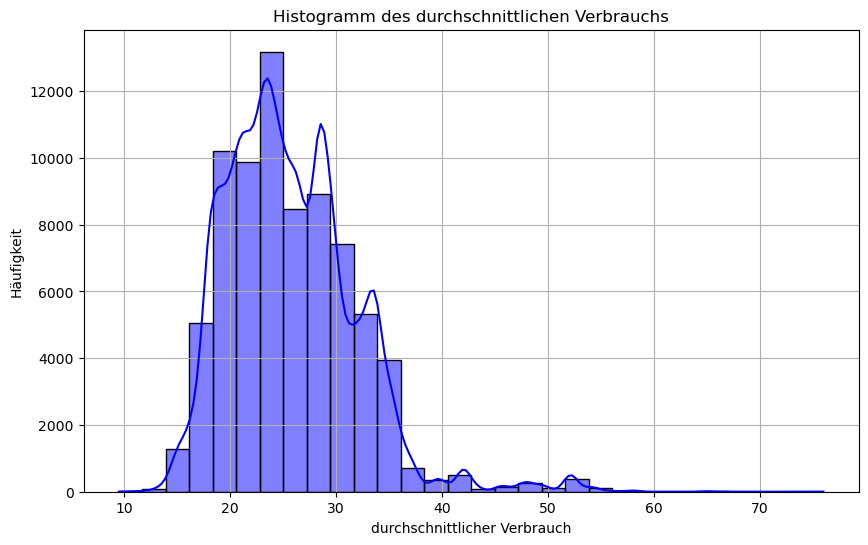

In [31]:
# Histogramm des durchschnittlichen Verbrauchs
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['average_fuel_economy'], kde=True, bins=30, color='blue')
plt.title('Histogramm des durchschnittlichen Verbrauchs')
plt.xlabel('durchschnittlicher Verbrauch')
plt.ylabel('Häufigkeit')
plt.grid(True)
plt.show()

Fluel_Type

In [33]:
# Kategorie "Compressed Natural Gas" ausschliessen
df_clean = df_clean[df_clean["fuel_type"]!="Compressed Natural Gas"]
df_clean["fuel_type"].value_counts()

fuel_type
Gasoline             70354
Flex Fuel Vehicle     3482
Hybrid                2127
Diesel                 401
Biodiesel              117
Name: count, dtype: int64

Transmission

In [37]:
# Umwandeln in eine neue Spalte "Manual": 1=Manuell oder 0=nicht manuell (automatisch)
df_clean["manual"] = df_clean["transmission"].apply(lambda x: 1 if x == "M" else 0)
df_clean[["manual", "transmission"]].loc[df_clean["transmission"]=="A"]
# Spalte "Transmission" löschen
df_clean = df_clean.drop(["transmission"], axis = 1)

Übersicht nochmals anschauen

In [40]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76481 entries, 1 to 100039
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   body_type             76481 non-null  object 
 1   fuel_type             76481 non-null  object 
 2   horsepower            76481 non-null  float64
 3   make_name             76481 non-null  object 
 4   mileage               76481 non-null  float64
 5   model_name            76481 non-null  object 
 6   price                 76481 non-null  float64
 7   wheel_system_display  76481 non-null  object 
 8   year                  76481 non-null  int64  
 9   listed_date           76481 non-null  object 
 10  average_fuel_economy  76481 non-null  float64
 11  manual                76481 non-null  int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 7.6+ MB


Aus der Variable Year und Listed Date eine neue Variable Age erstellen

1. Year auf des Jahr reduzieren

In [44]:
df_clean["listed_date"].unique()

array(['2020-08-20', '2020-07-29', '2020-06-25', '2020-07-30',
       '2020-08-26', '2020-07-28', '2020-08-13', '2020-09-06',
       '2019-07-10', '2020-08-27', '2020-09-02', '2020-08-16',
       '2020-09-03', '2020-05-31', '2020-07-11', '2020-08-03',
       '2020-09-01', '2020-04-16', '2020-07-31', '2020-07-14',
       '2020-08-09', '2020-08-12', '2020-07-18', '2020-08-23',
       '2020-09-05', '2019-08-07', '2020-02-07', '2020-07-23',
       '2020-09-04', '2020-01-01', '2019-07-27', '2019-11-09',
       '2020-08-29', '2020-08-15', '2020-09-08', '2020-08-02',
       '2020-02-13', '2020-07-04', '2020-07-24', '2020-08-06',
       '2020-06-27', '2020-08-31', '2020-08-08', '2020-09-07',
       '2020-03-18', '2020-07-26', '2020-08-11', '2020-08-14',
       '2020-08-28', '2020-06-20', '2020-06-30', '2020-07-21',
       '2020-08-30', '2020-07-07', '2020-02-08', '2019-09-14',
       '2020-03-11', '2020-07-19', '2020-05-23', '2020-09-09',
       '2020-08-04', '2019-09-28', '2019-08-11', '2019-

In [46]:

# Datumswerte in ein Datumsformat konvertieren
df_clean["listed_date"] = pd.to_datetime(df_clean["listed_date"])

# Jahr extrahieren und als Integer speichern
df_clean["listed_date"] = df_clean["listed_date"].dt.year.astype(int)


variable alter erstellen

In [49]:
df_clean["age"]= df_clean["listed_date"]- df_clean["year"]
del(df_clean["listed_date"])
del(df_clean["year"])

In [51]:
df_clean.head()

,body_type,fuel_type,horsepower,make_name,mileage,model_name,price,wheel_system_display,average_fuel_economy,manual,age
1,Sedan,Gasoline,184.0,Chrysler,25794.0,200,13000.0,Front-Wheel Drive,29.5,0,4
3,SUV / Crossover,Gasoline,295.0,Dodge,15732.0,Durango,27300.0,All-Wheel Drive,21.5,0,2
7,SUV / Crossover,Gasoline,138.0,Chevrolet,4580.0,Trax,15724.0,Front-Wheel Drive,29.0,0,2
8,SUV / Crossover,Gasoline,180.0,Jeep,25122.0,Cherokee,21000.0,Four-Wheel Drive,24.0,0,2
11,SUV / Crossover,Gasoline,241.0,Jeep,61161.0,Grand Cherokee,17300.0,Four-Wheel Drive,20.5,0,6


wir löschen variablen raus die bei age -1 haben

In [54]:
df_clean = df_clean.drop(df_clean[df_clean['age'] == -1].index)
df_clean["age"].unique()

array([ 4,  2,  6,  3,  7,  5,  0,  8,  1, 17, 15, 14, 10,  9, 13, 11, 12,
       16, 18, 23, 22, 19, 28, 21, 36, 27, 29, 20, 30, 31, 26, 24, 33, 25,
       35, 34, 32])

# df_clean Exportieren

In [59]:

# Pfad in deinem Google Drive
file_path = '../Data/clean_data.csv'

# DataFrame als CSV speichern
df_clean.to_csv(file_path, index=False)